# Exercise 10

Exercise 10. Train an SVM classifier on the wine dataset, which you can load using `sklearn.datasets.load_wine`.
This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators:
the goal is to train a classification model capable of predicting the cultivator based on the wine's
chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all
to classify all three classifiers. What accuracy can you reach?

In [1]:
from sklearn.datasets import load_wine

In [2]:
wine = load_wine(as_frame=True)

In [3]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Because `wine_data` is just a NumPy array, we need to wrap it into a panda `DataFrame` first. Then we can analyze it's  data types.

In [4]:
import pandas as pd

df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
wine["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Gaining insights

### Relationship analysis

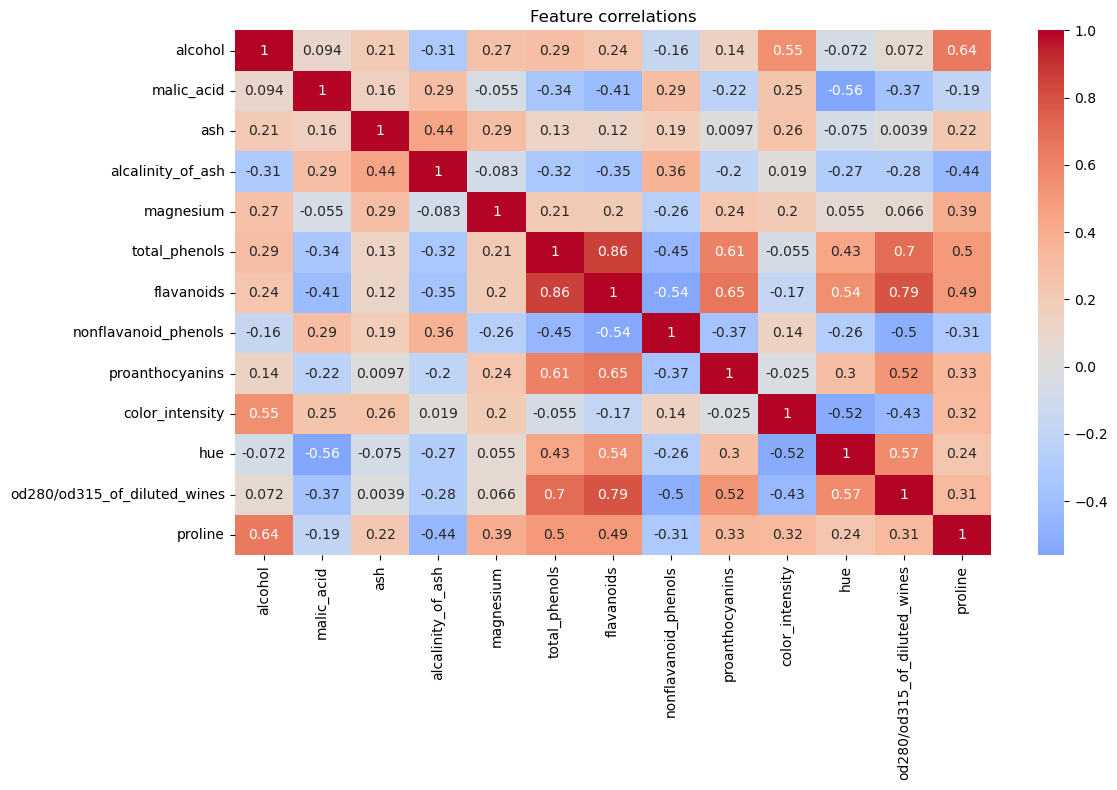

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# For corelation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature correlations')
plt.tight_layout()
plt.show()

### Estimate whether data is linear / non-linear

We may also try to estimate whether the data is or isn't linearly separable, by visualizing it.

Variance explained by first two components: 55.41%


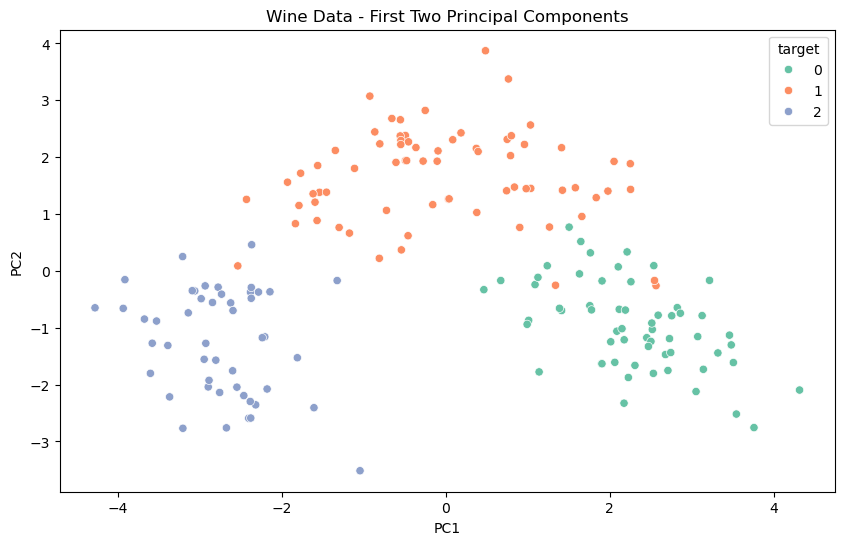

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create and apply pipeline
pca_pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=2)
)
X_pca = pca_pipeline.fit_transform(df)

# Create DataFrame for plottting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = wine.target

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2')
plt.title('Wine Data - First Two Principal Components')

# Get explained variance from the PCA step
pca = pca_pipeline.named_steps['pca']
print(f"Variance explained by first two components: {pca.explained_variance_ratio_.sum():.2%}")
plt.show()

PCA (Principal Component Analysis):
- A dimensionality reduction technique
- Takes high-dimensional data and finds the most important directions (components) of variation
- Each component is a new axis that captures maximum remaining variance in the data

PCA helps us visualize all 13 wine features at once. We chose 2 components because we want to visualize it in as 2D plot. The first
component captures the most variance, and second captures the most remaining variances. As we may see, our plot managed to capture 
55.41% of total variance of 13-dimensional data.

### Conclusions

Our feature correlations although interesting, is not particularly important in the context of SVMs.
SVMs find decision boundaries in high-dimensional space. Highly correlated features essentially represent the same information in different ways.
In fact, this can lead to unnecessary computational complexity. The "margin" that SVMs try to maximize might be distorted by redundant dimensions.

Even with 55 % of variances, PCA showed that all three wine classes are _linearly separable_. The boundaries between them look like they could be drawn with straight lines. Based
on that, we may suggest that _SVM_ might work well for this problem. We might not even need more complex kernel tricks (like `RBF`).

## Split the dataset into test and training set

In [10]:
from sklearn.model_selection import train_test_split
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## OvR vs OvO classification

SVC by its nature is a binary classifier (unlike RandomForrestClassifier for example, or GaussianNB). So we have to pick between OvR/OvA and OvO. Typically with OvR there are less classifiers to train, 
but for SVMs OvO is preferred because it implies training smaller sets. Scikit-Learn should detect when one tries to use a binary classification for a multi-class classification task, and automatically 
run OvR or OvO, depending on the algorithm

## Preparing the pipeline

The choice of training algorithm is `LinearSVC`: we have a linear dataset and we don't need to leverage the kernel trick, finally, commputation time wise it is more efficient.
We will also use `GridSearchCV` to find an optimal value for the `C` hyperparameter.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [19]:
model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(random_state=42, dual=True))
])
param_grid = [
  {
      'svc__C': [0.01, 0.1, 1, 10, 100],
      'svc__max_iter': [1000, 2000, 3000]
  }
]
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'svc__C': 0.01, 'svc__max_iter': 1000}
Best score: 0.9788177339901478


/opt/conda/envs/homl3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Validate the model

Based on the optimal hyperparameters identified in the previous step, we may now define the pipeline with the exact parameters.

We will further cross-validate it, to find out how the model performs across all folds of the training data.

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(C=0.01, max_iter=1000, dual=False, random_state=42))
])

# Get the predictions using cross-validation
y_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

Confusion Matrix:
[[45  0  0]
 [ 1 54  2]
 [ 0  0 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.95      0.97        57
           2       0.95      1.00      0.98        40

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



## Fit the optimal model and evaluate it with the test set

In [22]:
best_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

